In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
from scipy import interpolate


filepath='STRATUS.txt'

In [10]:
names=['date','time','SST','SSS','pCO2_sw','pCO2_air','xCO2_air','pH_sw','DOXY','CHL']
df=pd.read_csv(filepath,skiprows=110,delimiter=r'\s+',names=names,index_col=False,infer_datetime_format=True,parse_dates=[0])

display(df)
print(df.columns)

/tmp/ipykernel_105/1516356183.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv(filepath,skiprows=110,delimiter=r'\s+',names=names,index_col=False,infer_datetime_format=True,parse_dates=[0])
/tmp/ipykernel_105/1516356183.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv(filepath,skiprows=110,delimiter=r'\s+',names=names,index_col=False,infer_datetime_format=True,parse_dates=[0])


date   time     SST     SSS  pCO2_sw  pCO2_air  xCO2_air  pH_sw   
0     2006-10-16  21:00  19.872  35.435    373.1     369.8     379.6    NaN  \
1     2006-10-16  21:30  19.876  35.433    373.0     370.3     380.1    NaN   
2     2006-10-16  22:00  19.742  35.433    371.4     370.3     380.0    NaN   
3     2006-10-16  22:30  19.701  35.432    370.0     370.8     380.4    NaN   
4     2006-10-16  23:00  19.689  35.431    368.5     370.8     380.4    NaN   
...          ...    ...     ...     ...      ...       ...       ...    ...   
30682 2018-08-17  09:17  18.369  35.428    405.3     400.5     406.2  8.049   
30683 2018-08-17  12:17  18.363  35.424    399.5     400.8     405.9  8.055   
30684 2018-08-17  15:17  18.374  35.423    398.7     401.3     405.8  8.055   
30685 2018-08-17  18:17  18.400  35.424    399.4     400.9     405.9  8.053   
30686 2018-08-17  21:17  18.422  35.423    397.6     400.0     405.7  8.056   

       DOXY    CHL  
0       NaN    NaN  
1       NaN    NaN  
2       NaN    NaN  
3       NaN    NaN  
4       NaN    NaN  
...     ...    ...  
30682   NaN  0.479  
30683   NaN    NaN  
30684   NaN    NaN  
30685   NaN    NaN  
30686   NaN    NaN  

[30687 rows x 10 columns]

Index(['date', 'time', 'SST', 'SSS', 'pCO2_sw', 'pCO2_air', 'xCO2_air',
       'pH_sw', 'DOXY', 'CHL'],
      dtype='object')


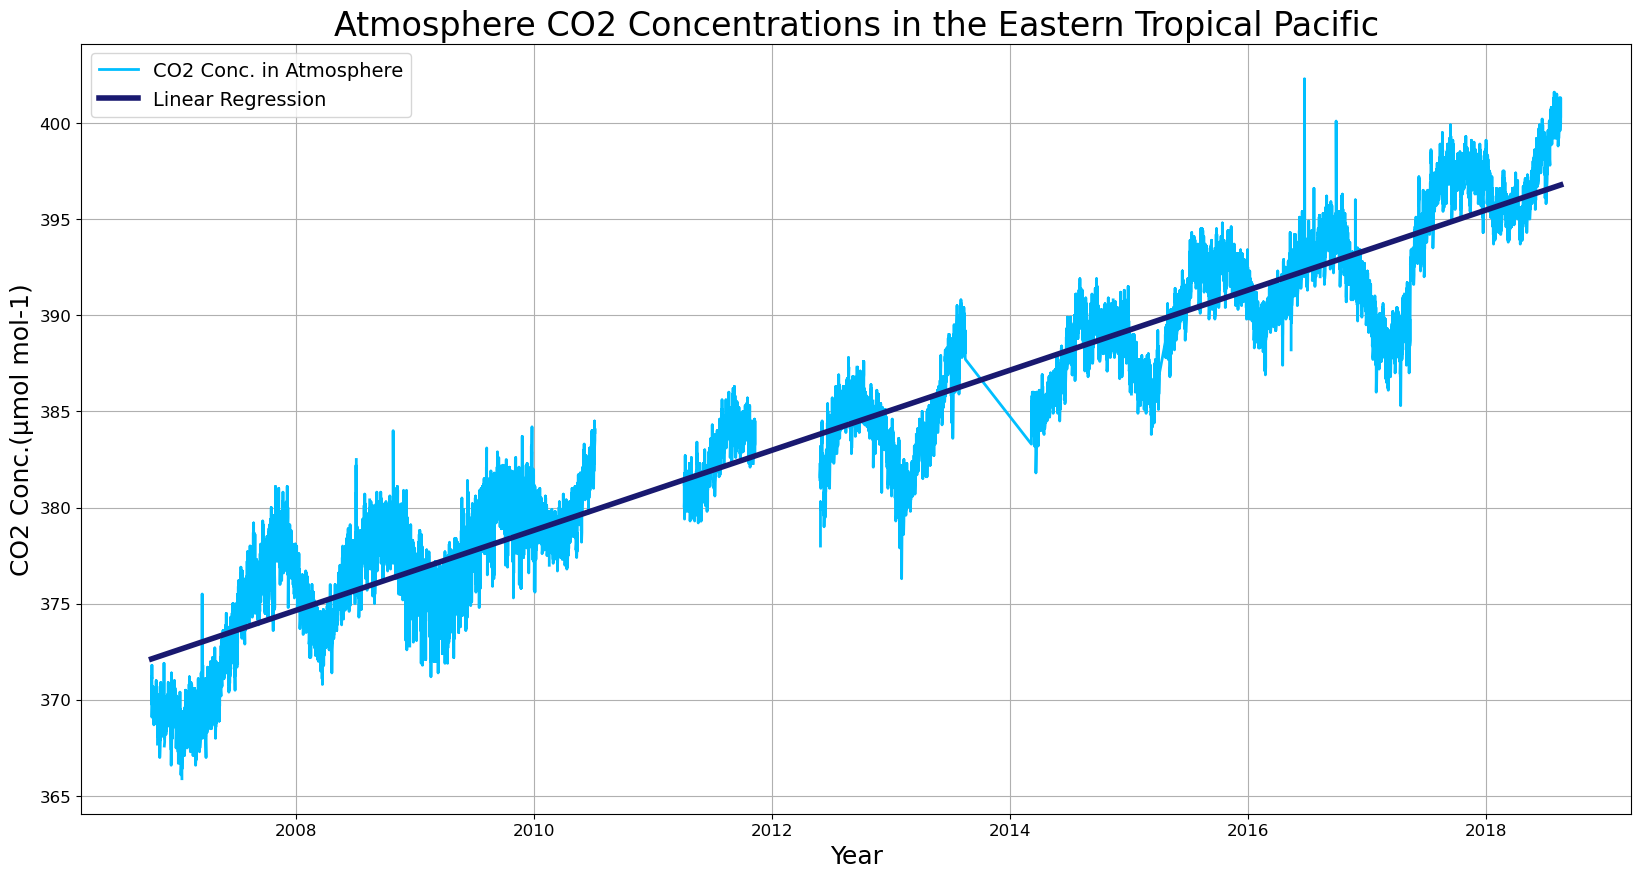

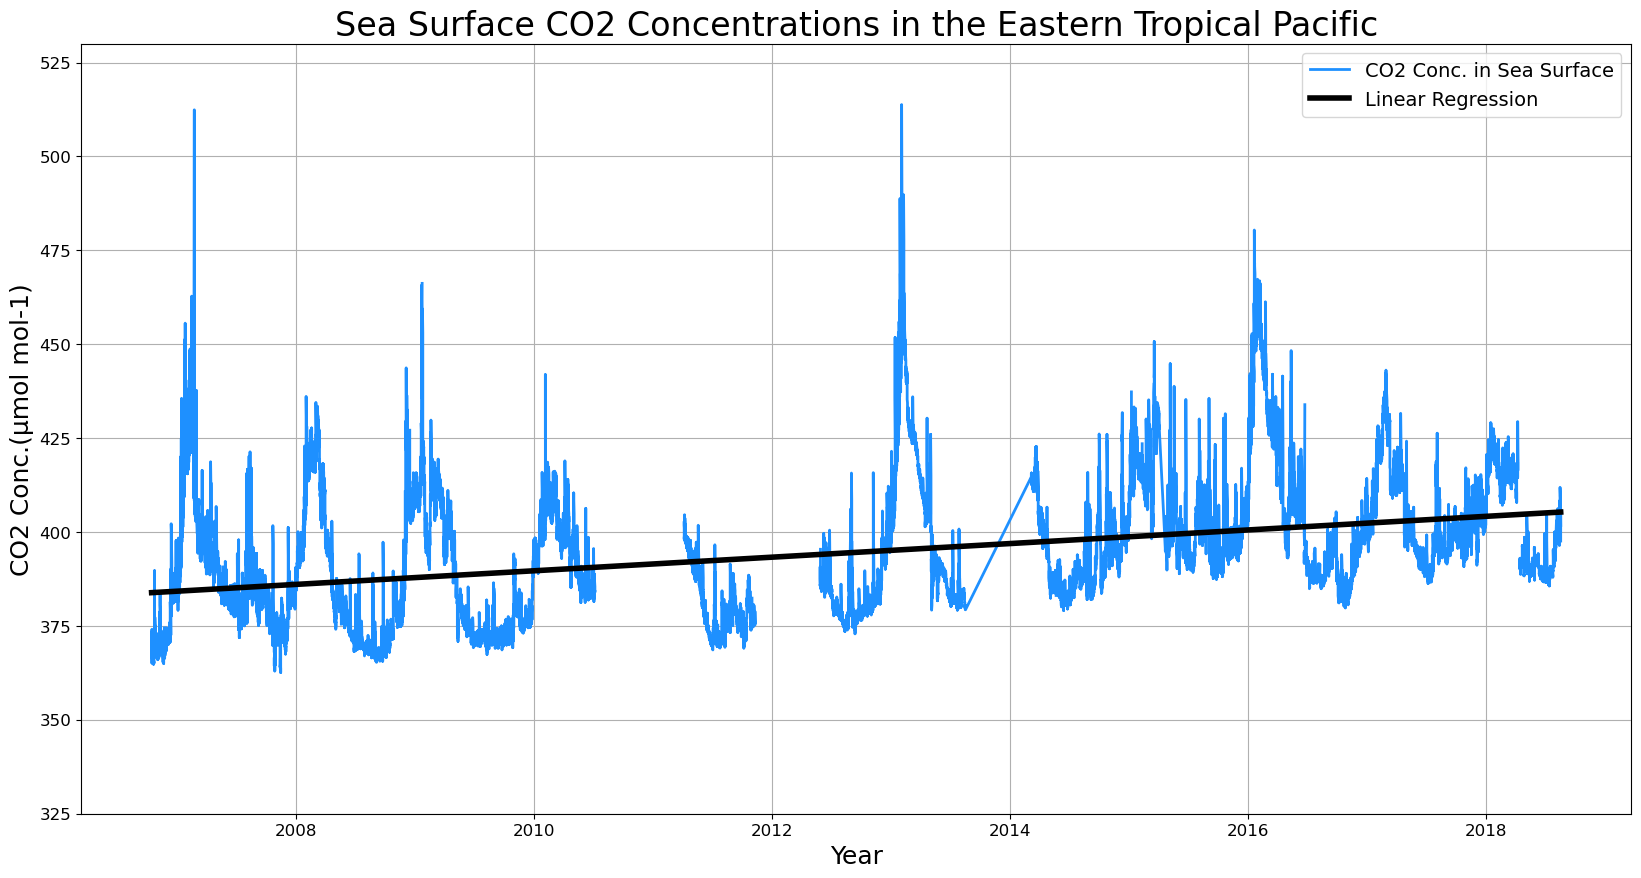

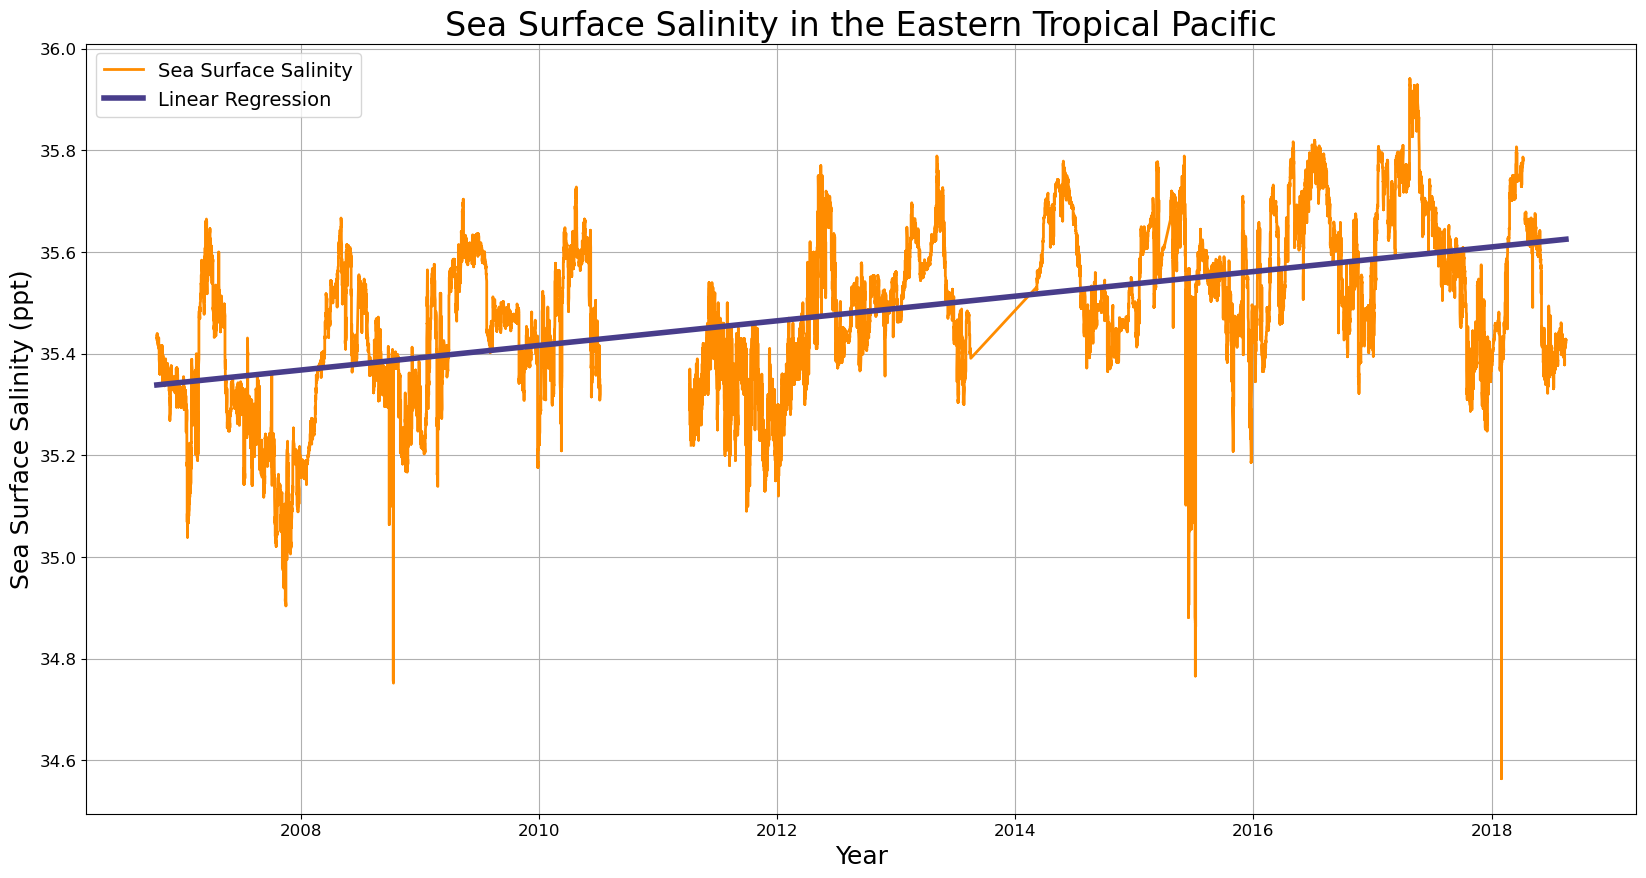

In [11]:
#variables
date=df['date']
carbon_air=df['pCO2_air']
carbon=df['pCO2_sw']
SST=df['SST']
SSS=df['SSS']



#create graph for CO2 concentrations in the air
fig=plt.figure(figsize=(20,10))
plt.plot(date,carbon_air,c='deepskyblue',linewidth=2,label='CO2 Conc. in Atmosphere')
plt.xlabel('Year',fontsize=18)
plt.ylabel('CO2 Conc.(µmol mol-1)',fontsize=18)
plt.title('Atmosphere CO2 Concentrations in the Eastern Tropical Pacific',fontsize=24)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#datetime objects to numbers for linregress() with t
t=np.array(date)
t_as_numbers=mdates.date2num(t)
#removed nan
carbon_air_nan=np.isnan(carbon_air)
t_as_numbers=t_as_numbers[~carbon_air_nan]
carbon_air_nonan=carbon_air[~carbon_air_nan]
times_nonan=date[~carbon_air_nan]
#create variables for linear regression
slope,intercept,rvalue,pvalue,stderr=stats.linregress(t_as_numbers,carbon_air_nonan)
x_values=times_nonan
y_values=slope*t_as_numbers+intercept
#create linear regression
plt.plot(x_values,y_values,c='midnightblue',label='Linear Regression',lw=4)
#legend
plt.legend(fontsize=14)



#create figure CO2 ocean conc
fig=plt.figure(figsize=(20,10))
plt.plot(date,carbon,c='dodgerblue',linewidth=2,label='CO2 Conc. in Sea Surface')
plt.xlabel('Year',fontsize=18)
plt.ylabel('CO2 Conc.(µmol mol-1)',fontsize=18)
plt.title('Sea Surface CO2 Concentrations in the Eastern Tropical Pacific',fontsize=24)
plt.grid()
plt.ylim([325,530])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#datetime objects to numbers for linregress() with c
c=np.array(date)
c_as_numbers=mdates.date2num(c)
#removed nan
carbon_nan=np.isnan(carbon)
c_as_numbers=c_as_numbers[~carbon_nan]
carbon_nonan=carbon[~carbon_nan]
ctimes_nonan=date[~carbon_nan]
#create variables for linear regression
slope,intercept,rvalue,pvalue,stderr=stats.linregress(c_as_numbers,carbon_nonan)
x_values=ctimes_nonan
y_values=slope*c_as_numbers+intercept
#create linear regression
plt.plot(x_values,y_values,c='k',label='Linear Regression',lw=4)
#legend
plt.legend(fontsize=14)




#create figure for SSS
fig=plt.figure(figsize=(20,10))
plt.plot(date,SSS,c='darkorange',linewidth=2,label='Sea Surface Salinity')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sea Surface Salinity (ppt)',fontsize=18)
plt.title('Sea Surface Salinity in the Eastern Tropical Pacific',fontsize=24)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#datetime objects to numbers for linregress() with j
j=np.array(date)
j_as_numbers=mdates.date2num(j)
#removed nan
SSS_nan=np.isnan(SSS)
j_as_numbers=j_as_numbers[~SSS_nan]
SSS_nonan=SSS[~SSS_nan]
jtimes_nonan=date[~SSS_nan]
#create variables for linear regression
slope,intercept,rvalue,pvalue,stderr=stats.linregress(j_as_numbers,SSS_nonan)
x_jvalues=jtimes_nonan
y_jvalues=slope*j_as_numbers+intercept
#create linear regression
plt.plot(x_jvalues,y_jvalues,c='darkslateblue',label='Linear Regression',lw=4)
#legend
plt.legend(fontsize=14)